In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from datetime import datetime, timedelta

In [2]:
product = pd.read_csv('./data/product_brand.csv', on_bad_lines='skip')
transaction = pd.read_csv('./data/transaction_new.csv')
customer = pd.read_csv('./data/customer.csv')

In [3]:
customer = customer.assign(first_join_date=pd.to_datetime(customer['first_join_date']))
customer = customer.assign(birthdate=pd.to_datetime(customer['birthdate']))
customer = customer.assign(age=2022-customer['birthdate'].dt.year)
customer

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,29
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,31
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,Manah,Mustofa,bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c,bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...,M,2000-11-17,Android,fa1914a5-0c12-4393-8d6c-af4e4a4de6aa,Android 4.3.1,-5.203523,105.635530,Lampung,Indonesia,2020-10-17,22
99996,72065,Danu,Pradana,4af2b3d5-c573-4032-b29c-24782745a2f6,4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...,M,1998-03-30,Android,d8234d67-6954-4e05-8293-d37ef25bfd7e,Android 8.0.0,4.474702,95.904876,Aceh,Indonesia,2017-11-25,24
99997,32818,Talia,Aryani,af0edbfa-f354-4765-813b-b9f151022555,af0edbfa_f354_4765_813b_b9f151022555@startupca...,F,1993-01-12,Android,3c586f64-aab7-4dd6-be94-5d47c6361081,Android 11,-3.330376,127.028348,Maluku,Indonesia,2018-09-01,29
99998,75597,Ajimat,Mansur,35cd82f3-6b86-42a2-bb15-933770d7f250,35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...,M,2000-09-13,Android,3b209c58-d305-4b46-9363-b90a3914f008,Android 7.1,-2.173114,101.495913,Jambi,Indonesia,2020-05-31,22


In [4]:
transaction = transaction.assign(created_at=pd.to_datetime(transaction['created_at']))

In [5]:
paid_transaction = transaction[transaction['payment_status']=='Success']
paid_transaction

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254579,2020-11-12 18:19:20.074873+00:00,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,NaN,10000,2020-11-18T18:06:06.493534Z,-6.286732,106.902229,287688,42915,1,277688
1254581,2021-12-09 07:35:18.222046+00:00,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-11 01:20:36.944593+00:00,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-18 11:01:09.623382+00:00,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [6]:
paid_transaction = paid_transaction.assign(total_item_price = paid_transaction['total_amount']-paid_transaction['shipment_fee'])
paid_transaction = paid_transaction.drop(['booking_id', 'payment_method', 'payment_status', 'shipment_date_limit', 
                                          'shipment_location_lat', 'shipment_location_long', 'product_id', 'item_price', 
                                          'total_amount', 'shipment_fee'], axis=1)
paid_transaction = paid_transaction.assign(created_at = paid_transaction['created_at'].dt.strftime('%Y-%m-%d'))
paid_transaction = paid_transaction.assign(created_at = pd.to_datetime(paid_transaction['created_at']))
paid_transaction = paid_transaction.sort_values('created_at').reset_index(drop=True)
paid_transaction

,created_at,customer_id,session_id,promo_amount,promo_code,quantity,total_item_price
0,2016-06-30,74089,607d864b-76b5-45a1-a45d-7fb666a03ea1,0,NaN,3,630795
1,2016-07-01,73773,8f385c80-1b70-4861-80ac-5eb3b5620fee,0,NaN,1,246670
2,2016-07-01,6183,c5d3792d-9220-47db-ad80-4932f3f88d0e,6053,XX2022,1,568826
3,2016-07-01,6183,c5d3792d-9220-47db-ad80-4932f3f88d0e,6053,XX2022,1,568826
4,2016-07-01,16228,bbff775e-4166-46aa-bbfd-4ba6465add17,0,NaN,1,318792
...,...,...,...,...,...,...,...
1201030,2022-07-31,9787,5abd8cbe-e311-4691-a959-3775d7090680,0,NaN,1,450649
1201031,2022-07-31,34977,581bcb5f-77fd-46fc-bde4-41b2a6266b93,0,NaN,4,2641457
1201032,2022-07-31,34977,581bcb5f-77fd-46fc-bde4-41b2a6266b93,0,NaN,1,2641457
1201033,2022-07-31,95196,18c4a3bb-6954-4919-af8c-d6343839fe4a,0,NaN,1,390873


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
gender_encoder = LabelEncoder()

In [9]:
merge_customer = customer[['customer_id', 'gender', 'age', 'first_join_date']]
merge_customer = merge_customer.assign(gender=gender_encoder.fit_transform(merge_customer['gender']))
print(gender_encoder.classes_)
display(merge_customer)

['F' 'M']


,customer_id,gender,age,first_join_date
0,2870,0,26,2019-07-21
1,8193,0,29,2017-07-16
2,7279,1,33,2020-08-23
3,88813,1,31,2021-10-03
4,82542,1,22,2021-04-11
...,...,...,...,...
99995,34743,1,22,2020-10-17
99996,72065,1,24,2017-11-25
99997,32818,0,29,2018-09-01
99998,75597,1,22,2020-05-31


In [10]:
paid_transaction = paid_transaction.merge(merge_customer, how='left', on='customer_id')
paid_transaction

,created_at,customer_id,session_id,promo_amount,promo_code,quantity,total_item_price,gender,age,first_join_date
0,2016-06-30,74089,607d864b-76b5-45a1-a45d-7fb666a03ea1,0,NaN,3,630795,0,43,2016-06-30
1,2016-07-01,73773,8f385c80-1b70-4861-80ac-5eb3b5620fee,0,NaN,1,246670,1,31,2016-06-30
2,2016-07-01,6183,c5d3792d-9220-47db-ad80-4932f3f88d0e,6053,XX2022,1,568826,1,27,2016-07-01
3,2016-07-01,6183,c5d3792d-9220-47db-ad80-4932f3f88d0e,6053,XX2022,1,568826,1,27,2016-07-01
4,2016-07-01,16228,bbff775e-4166-46aa-bbfd-4ba6465add17,0,NaN,1,318792,1,27,2016-07-01
...,...,...,...,...,...,...,...,...,...,...
1201030,2022-07-31,9787,5abd8cbe-e311-4691-a959-3775d7090680,0,NaN,1,450649,1,35,2022-07-06
1201031,2022-07-31,34977,581bcb5f-77fd-46fc-bde4-41b2a6266b93,0,NaN,4,2641457,0,28,2022-07-30
1201032,2022-07-31,34977,581bcb5f-77fd-46fc-bde4-41b2a6266b93,0,NaN,1,2641457,0,28,2022-07-30
1201033,2022-07-31,95196,18c4a3bb-6954-4919-af8c-d6343839fe4a,0,NaN,1,390873,0,24,2021-07-24


# Preprocess_data

## pick_time

In [11]:
def pick_time(year_month_day:str, period:int, window_size:int) : 
    picked_time = datetime.strptime(year_month_day, '%Y-%m-%d') - timedelta(days=window_size) # pick 시점을 window_size만큼 과거로 이동
    start_time = picked_time - timedelta(days=6*period) # picked_time포함 이전 6*period
    end_time = picked_time + timedelta(days=period) # picked_time 이후 1 period
    return picked_time, start_time, end_time

## braket_retention

In [12]:
def braket_retention(picked_data:pd.DataFrame, start_time:pd.Timestamp, end_time:pd.Timestamp, period:int) :    
    # retain 기간별로 dataframe 적재
    retain_period = []
    for i in range(7) : 
        retain_period.append(picked_data.loc[(picked_data['created_at']>=start_time+timedelta(days=period*i))&
                                             (picked_data['created_at']<start_time+timedelta(days=period*(i+1)))])
    
    # retain 기간 별로 유저가 방문했는지 여부
    # groupby('customer_id').count로 계산
    retention_group = []
    for i, df in enumerate(retain_period) : 
        retention_group.append(df.groupby('customer_id').count())
    
    # 리텐션 테이블 생성
    retention = pd.concat(retention_group, axis=1)
    retention.columns = [f'retention-{period*6}', f'retention-{period*5}', f'retention-{period*4}', f'retention-{period*3}', 
                         f'retention-{period*2}', f'retention-{period*1}', 'y']
    retention = retention[~retention[f'retention-{period*6}'].isnull()] # retention-6*period의 비어있는 경우 삭제
    retention = retention.fillna(0) # 그 외 null값은 0으로 채움
    retention = retention.astype(int)
    retention[retention>1] = 1
    retention = retention.assign(y=[0 if t else 1 for t in list(retention['y']==1)])
    
    return retention

## build_data

In [14]:
def build_data(picked_period:pd.DataFrame, picked_time:pd.Timestamp, start_time:pd.Timestamp, end_time:pd.Timestamp, period:int) :     
    picked_data = picked_period[['customer_id', 'created_at']]
    print(start_time, end_time-timedelta(days=1))
    retention_table = braket_retention(picked_data, start_time, end_time, period)
    
    for_train_data = picked_period[(picked_period['created_at']>=start_time)
                                   &(picked_period['created_at']<picked_time)]
    
    base_customer_list = retention_table.index.to_list()
    for_train_data=for_train_data[for_train_data['customer_id'].isin(base_customer_list)].groupby('session_id').agg({'created_at':'max',
                                                                                                                    'customer_id':'max',
                                                                                                                    'promo_amount':'max',
                                                                                                                    'promo_code':'max',
                                                                                                                    'quantity':'sum',
                                                                                                                    'total_item_price':'max',
                                                                                                                    'gender':'max',
                                                                                                                    'first_join_date':'max'})
    
    by_cid_list = []
    for _, group in for_train_data.groupby('customer_id') : 
        temp = group.sort_values('created_at')
        temp = temp.assign(time_diff=temp['created_at'].diff())
        by_cid = pd.DataFrame(temp.head(1), columns=temp.columns).set_index('customer_id')
        by_cid = by_cid.assign(created_at=temp['created_at'].max(), 
                               promo_amount=temp['promo_amount'].sum(), 
                               promo_code=temp['promo_code'].count(), 
                               quantity=temp['quantity'].sum(), 
                               total_item_price=temp['total_item_price'].sum(),
                               avg_item_price=temp['total_item_price'].mean(),
                               time_diff=str(temp['time_diff'].mean()))
        by_cid.loc[by_cid['time_diff']=='NaT', 'time_diff'] = '-1'
        by_cid = by_cid.assign(time_diff = by_cid['time_diff'].str.split(' ').str.get(0).astype(int))
        by_cid_list.append(by_cid)
        
    by_cid_df = pd.concat(by_cid_list).rename(columns={'total_item_price':'total_amt_spent', 
                                                       'promo_amount':'total_prm_amt',
                                                       'quantity':'total_qty',
                                                       'promo_code':'num_prm_used',
                                                       'created_at':'days_since_last',
                                                       'first_join_date':'days_since_regist'})
    by_cid_df = by_cid_df.assign(days_since_last=(picked_time - by_cid_df['days_since_last']).astype(str).str.split(' ').str.get(0).astype(int))
    by_cid_df = by_cid_df.assign(days_since_regist=(picked_time - by_cid_df['days_since_regist']).astype(str).str.split(' ').str.get(0).astype(int))

    return pd.concat([by_cid_df, retention_table], axis=1)

## build_train_test_data

In [15]:
def build_train_test_data(df:pd.DataFrame, picked_date:str, period:int, window_size:int, num_iter:int) :
    
    picked_date_t = (pd.to_datetime(picked_date) + timedelta(days=210)).strftime('%Y-%m-%d')
    picked_time_t, start_time_t, end_time_t = pick_time(picked_date_t, period, 0)
    picked_test_period = df[(df['created_at']>=start_time_t) &(df['created_at']<end_time_t)]
    test_data = build_data(picked_test_period, picked_time_t, start_time_t, end_time_t, period).reset_index(drop=True)
    
    stack_train_list = []
    
    for i in tqdm(range(num_iter)) :
        picked_time, start_time, end_time = pick_time(picked_date, period, window_size*i)
        if end_time > start_time_t : 
            raise Exception('data leakage가 발생할 수 있습니다.') 
        picked_period = df[(df['created_at']>=start_time) &(df['created_at']<end_time)]
        stack_train_list.append(build_data(picked_period, picked_time, start_time, end_time, period))
        
    train_data = pd.concat(stack_train_list, axis=0).reset_index(drop=True)
    return train_data, test_data

In [16]:
for_validation = paid_transaction[paid_transaction['created_at']>=pd.to_datetime('2022-01-01')].copy()
display(for_validation)

valid_idx = for_validation.index
paid_transaction = paid_transaction.drop(valid_idx)
display(paid_transaction)

picked_valid_time = (pd.to_datetime('2022-07-31') - timedelta(days=30)).strftime('%Y-%m-%d')
print(picked_valid_time)

,created_at,customer_id,session_id,promo_amount,promo_code,quantity,total_item_price,gender,age,first_join_date
927712,2022-01-01,60776,820e409a-51ba-406a-8b28-a8758f2da771,0,NaN,2,392407,0,31,2019-03-02
927713,2022-01-01,35666,25d0ef0c-bd44-491c-9559-b7e6deca5f20,4962,WEEKENDSERU,1,300900,1,38,2018-07-13
927714,2022-01-01,40916,9616a2c1-b9bb-4d62-8cdc-9a864fef2599,6330,WEEKENDSERU,1,163258,0,10,2020-07-25
927715,2022-01-01,33158,b5a8a6cd-5464-40ef-9dac-daa7678af8f8,0,NaN,1,224915,1,28,2021-06-05
927716,2022-01-01,22962,b147cac5-cf7b-47dc-be09-8a553e74d187,5984,WEEKENDMANTAP,1,314676,0,26,2021-05-30
...,...,...,...,...,...,...,...,...,...,...
1201030,2022-07-31,9787,5abd8cbe-e311-4691-a959-3775d7090680,0,NaN,1,450649,1,35,2022-07-06
1201031,2022-07-31,34977,581bcb5f-77fd-46fc-bde4-41b2a6266b93,0,NaN,4,2641457,0,28,2022-07-30
1201032,2022-07-31,34977,581bcb5f-77fd-46fc-bde4-41b2a6266b93,0,NaN,1,2641457,0,28,2022-07-30
1201033,2022-07-31,95196,18c4a3bb-6954-4919-af8c-d6343839fe4a,0,NaN,1,390873,0,24,2021-07-24


,created_at,customer_id,session_id,promo_amount,promo_code,quantity,total_item_price,gender,age,first_join_date
0,2016-06-30,74089,607d864b-76b5-45a1-a45d-7fb666a03ea1,0,NaN,3,630795,0,43,2016-06-30
1,2016-07-01,73773,8f385c80-1b70-4861-80ac-5eb3b5620fee,0,NaN,1,246670,1,31,2016-06-30
2,2016-07-01,6183,c5d3792d-9220-47db-ad80-4932f3f88d0e,6053,XX2022,1,568826,1,27,2016-07-01
3,2016-07-01,6183,c5d3792d-9220-47db-ad80-4932f3f88d0e,6053,XX2022,1,568826,1,27,2016-07-01
4,2016-07-01,16228,bbff775e-4166-46aa-bbfd-4ba6465add17,0,NaN,1,318792,1,27,2016-07-01
...,...,...,...,...,...,...,...,...,...,...
927707,2021-12-31,69072,3667c9d0-fa99-4c2c-a618-8da5c55da81f,0,NaN,1,1003478,0,20,2017-09-17
927708,2021-12-31,13251,e9ac2fab-b353-4902-bcdd-38548816b1d4,0,NaN,1,369468,1,17,2021-01-16
927709,2021-12-31,59588,08bbbd4d-f771-4268-98c5-0b394537a29d,0,NaN,1,107168,1,42,2021-09-12
927710,2021-12-31,24161,91b94b7d-e7b5-4493-a8a1-ff52aa544148,3317,BUYMORE,1,271146,0,23,2020-06-27


2022-07-01


In [17]:
train_picked_date = '2021-05-01'
train_data, test_data = build_train_test_data(df=paid_transaction, picked_date=train_picked_date, period=30, window_size=30, num_iter=6)
train_data

2021-05-31 00:00:00 2021-12-26 00:00:00


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

2020-11-02 00:00:00 2021-05-30 00:00:00


 17%|██████████████                                                                      | 1/6 [00:47<03:56, 47.37s/it]

2020-10-03 00:00:00 2021-04-30 00:00:00


 33%|████████████████████████████                                                        | 2/6 [01:34<03:08, 47.14s/it]

2020-09-03 00:00:00 2021-03-31 00:00:00


 50%|██████████████████████████████████████████                                          | 3/6 [02:18<02:17, 46.00s/it]

2020-08-04 00:00:00 2021-03-01 00:00:00


 67%|████████████████████████████████████████████████████████                            | 4/6 [03:03<01:30, 45.24s/it]

2020-07-05 00:00:00 2021-01-30 00:00:00


 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [03:49<00:45, 45.64s/it]

2020-06-05 00:00:00 2020-12-31 00:00:00


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:28<00:00, 44.82s/it]


,days_since_last,total_prm_amt,num_prm_used,total_qty,total_amt_spent,gender,days_since_regist,time_diff,avg_item_price,retention-180,retention-150,retention-120,retention-90,retention-60,retention-30,y
0,27,10637,2,8,1913495,1,980,28,318915.833333,1,1,1,1,1,1,0
1,165,3463,1,1,394096,0,581,-1,394096.000000,1,0,0,0,0,0,1
2,3,6401,2,16,3707028,0,777,57,926757.000000,1,0,0,1,1,1,1
3,32,36853,4,13,3881987,1,277,49,970496.750000,1,1,0,1,1,0,0
4,172,3010,1,2,362822,1,173,-1,362822.000000,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63670,34,9576,1,6,1117753,1,389,71,372584.333333,1,0,1,0,1,0,1
63671,41,0,0,2,390778,0,822,130,195389.000000,1,0,0,0,1,0,1
63672,24,5694,1,12,3543503,0,602,32,708700.600000,1,0,1,1,1,1,0
63673,19,7178,2,8,1660523,1,794,31,276753.833333,1,1,1,1,1,1,0


In [21]:
train_data['y'].value_counts()

0    42745
1    20930
Name: y, dtype: int64

In [19]:
valid_pick, valid_start, valid_end = pick_time(picked_valid_time, 30, 0)
validation_data = build_data(picked_period=for_validation, picked_time=valid_pick, start_time=valid_start, end_time=valid_end, period=30).reset_index(drop=True)
validation_data

2022-01-02 00:00:00 2022-07-30 00:00:00


,days_since_last,total_prm_amt,num_prm_used,total_qty,total_amt_spent,gender,days_since_regist,time_diff,avg_item_price,retention-180,retention-150,retention-120,retention-90,retention-60,retention-30,y
0,5,27717,5,13,2943828,1,1406,28,4.205469e+05,1,1,1,1,1,1,1
1,34,0,0,5,891635,0,370,67,2.972117e+05,1,0,1,0,1,0,1
2,177,3880,1,1,63320,0,1007,-1,6.332000e+04,1,0,0,0,0,0,1
3,42,9223,1,7,1935302,0,1203,43,4.838255e+05,1,1,0,1,1,0,1
4,5,43555,9,76,19301644,1,238,5,5.361568e+05,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16998,5,4988,1,11,2927550,1,1370,31,4.879250e+05,1,1,1,1,1,1,1
16999,37,16335,3,9,997683,0,1118,40,2.494208e+05,1,0,1,1,1,0,0
17000,37,0,0,3,462880,0,731,63,1.542933e+05,1,0,1,0,1,0,1
17001,8,14778,3,19,5671523,0,684,12,3.781015e+05,1,1,1,1,1,1,0


In [20]:
validation_data.y.value_counts()

1    10107
0     6896
Name: y, dtype: int64

# Modeling

In [19]:
# 모델링 전 단계로 이탈 유저 vs 유지 유저의 유저 페르소나 혹은 행동 패턴의 차이 비교 분석

# 변수 설정
#    - y : 이탈(유지) 여부
#    - x : 고객 성별, 고객 나이, 기간 내 구매 빈도(F), 기간 내 구매액(M), 기간 내 구매한 아이템 갯수(quantity), 
#           기간 내 사용 프로모션의 횟수, 최종 거래일 이후 경과된 기간, 최종 거래 직전 거래 일과 최종 거래일의 간격(R)
#          가입일자, 거주지, 상대적 활동량의 감소(지지난달 대비 지난달의 활동량 감소)
#          경쟁사 혹은 다른 이유로 특정 달에만 리텐션이 감소했다면 걸러낼 수 있어야할 듯?

# 이번 달에 이탈할 것으로 예측되는 유저를 알아내는 것이 목적 -> 추가 프로모션 지급 or 푸시 알림 등의 개별 케어를 액션으로 할 수 있기 때문에
# 특정한 기간을 학습해서 다음 달에 이탈할지 예측

# 처음 모델은 쉽게 잘 되면 고도화
# 실험환경 : 하이퍼파라미터 넣어서
# 윈도우 사이즈 조절해서 데이터셋 생성해낼 수 있도록 할 것

In [20]:
# 이번 달에 이탈할 것으로 예측되는 유저를 알아내는 것이 목적 -> 추가 프로모션 지급 or 푸시 알림 등의 개별 케어를 액션으로 할 수 있기 때문에
# 특정한 기간을 학습해서 다음 달에 이탈할지 예측

In [40]:
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from xgboost import XGBClassifier
import statsmodels.api as sm 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [23]:
pycaret_model = setup(session_id=42, data=train_data, target='y', test_data=test_data, normalize=True, normalize_method='zscore', transformation=True, use_gpu=True, index=False)

,Description,Value
0,Session id,42
1,Target,y
2,Target type,Binary
3,Original data shape,"(77003, 16)"
4,Transformed data shape,"(77003, 16)"
5,Transformed train set shape,"(63675, 16)"
6,Transformed test set shape,"(13328, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [24]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [25]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9535,0.9753,0.9316,0.9276,0.9295,0.8948,0.8949,1.0180
lightgbm,Light Gradient Boosting Machine,0.9528,0.9758,0.9312,0.9262,0.9285,0.8933,0.8935,1.4780
rf,Random Forest Classifier,0.9513,0.9721,0.9269,0.9257,0.9262,0.8898,0.8900,1.7050
et,Extra Trees Classifier,0.9447,0.9697,0.9133,0.9187,0.9158,0.8747,0.8748,1.6110
gbc,Gradient Boosting Classifier,0.9433,0.9719,0.9178,0.9112,0.9142,0.8718,0.8721,7.9840
dt,Decision Tree Classifier,0.9223,0.9121,0.8825,0.8816,0.8820,0.8241,0.8242,0.8030
ada,Ada Boost Classifier,0.9208,0.9592,0.8677,0.8898,0.8783,0.8197,0.8201,2.6000
knn,K Neighbors Classifier,0.9107,0.9415,0.8370,0.8858,0.8605,0.7949,0.7958,1.5450
lr,Logistic Regression,0.9004,0.9476,0.8183,0.8718,0.8439,0.7709,0.7720,1.4100
svm,SVM - Linear Kernel,0.8955,0.0000,0.7946,0.8776,0.8331,0.7574,0.7602,0.5520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)

## Over_Sampling

In [39]:
X_train, y_train = train_data.drop('y', axis=1), train_data['y'] 
X_test, y_test = test_data.drop('y', axis=1), test_data['y']

smote = SMOTE()
adasyn = ADASYN()
border_smote = BorderlineSMOTE()

X_train_SM, y_train_SM = smote.fit_resample(X_train, y_train)
X_train_AD, y_train_AD = adasyn.fit_resample(X_train, y_train)
X_train_BS, y_train_BS = border_smote.fit_resample(X_train, y_train)

In [41]:
xgb_basic = XGBClassifier(random_state=42).fit(X_train, y_train)
xgb_SM = XGBClassifier(random_state=42).fit(X_train_SM, y_train_SM)
xgb_BS = XGBClassifier(random_state=42).fit(X_train_BS, y_train_BS)
xgb_AD = XGBClassifier(random_state=42).fit(X_train_AD, y_train_AD)

ypred_basic = xgb_basic.predict(X_test)
ypred_SM = xgb_SM.predict(X_test)
ypred_BS = xgb_BS.predict(X_test)
ypred_AD = xgb_AD.predict(X_test)

In [42]:
def print_metric(y_test, y_pred) : 
    acc = (accuracy_score(y_test, y_pred)*100).round(2)
    prc = (precision_score(y_test, y_pred)*100).round(2)
    rc = (recall_score(y_test, y_pred)*100).round(2)
    f1 = (f1_score(y_test, y_pred)*100).round(2)
    
    display(pd.DataFrame(confusion_matrix(y_pred, y_test)))
    
    print(f'정확도 : {acc}%')
    print(f'정밀도 : {prc}%')
    print(f'재현율 : {rc}%')
    print(f'f1-score: {f1}%')

In [43]:
print('basic')
print_metric(ypred_basic, y_test)
print('------------------------------\nSMOTE')
print_metric(ypred_SM, y_test)
print('------------------------------\nBorderline_SMOTE')
print_metric(ypred_BS, y_test)
print('------------------------------\nADASYN')
print_metric(ypred_AD, y_test)

basic


,0,1
0,8661,98
1,342,4227


정확도 : 96.7%
정밀도 : 92.51%
재현율 : 97.73%
f1-score: 95.05%
------------------------------
SMOTE


,0,1
0,8626,133
1,307,4262


정확도 : 96.7%
정밀도 : 93.28%
재현율 : 96.97%
f1-score: 95.09%
------------------------------
Borderline_SMOTE


,0,1
0,8602,157
1,305,4264


정확도 : 96.53%
정밀도 : 93.32%
재현율 : 96.45%
f1-score: 94.86%
------------------------------
ADASYN


,0,1
0,8596,163
1,306,4263


정확도 : 96.48%
정밀도 : 93.3%
재현율 : 96.32%
f1-score: 94.79%


In [44]:
log_reg = sm.Logit(y_train, X_train).fit()
log_reg_predict = log_reg.predict(X_test)
print(log_reg.summary())
print_metric(y_test, log_reg_predict.round())

Optimization terminated successfully.
         Current function value: 0.298462
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                63675
Model:                          Logit   Df Residuals:                    63660
Method:                           MLE   Df Model:                           14
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.5287
Time:                        21:13:23   Log-Likelihood:                -19005.
converged:                       True   LL-Null:                       -40322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
days_since_last      -0.0150      0.001    -13.102      0.000      -0.017      -0.013
total_pr

,0,1
0,8563,1203
1,196,3366


정확도 : 89.5%
정밀도 : 94.5%
재현율 : 73.67%
f1-score: 82.79%


In [45]:
X_valid = validation_data.drop('y', axis=1)
y_valid = validation_data['y']

lgbm_valid_predict = lgbm_basic.predict(X_valid)
log_reg_valid_predict = log_reg.predict(X_valid)

In [46]:
log_reg_valid_predict = log_reg.predict(X_valid)

In [47]:
# Logistic validation
print_metric(y_valid, log_reg_valid_predict.round())
# LGBM validation
print_metric(y_valid, lgbm_valid_predict)

,0,1
0,6856,6421
1,40,3686


정확도 : 62.0%
정밀도 : 98.93%
재현율 : 36.47%
f1-score: 53.29%


,0,1
0,6879,4711
1,17,5396


정확도 : 72.19%
정밀도 : 99.69%
재현율 : 53.39%
f1-score: 69.54%


In [48]:
ypred_basic_v = xgb_basic.predict(X_valid)
ypred_SM_v = xgb_SM.predict(X_valid)
ypred_BS_v = xgb_BS.predict(X_valid)
ypred_AD_v = xgb_AD.predict(X_valid)

print('basic')
print_metric(ypred_basic_v, y_valid)
print('------------------------------\nSMOTE')
print_metric(ypred_SM_v, y_valid)
print('------------------------------\nBorderline_SMOTE')
print_metric(ypred_BS_v, y_valid)
print('------------------------------\nADASYN')
print_metric(ypred_AD_v, y_valid)

# 평가지표가 제일 높았던 것은 SMOTE임

basic


,0,1
0,6879,17
1,4672,5435


정확도 : 72.42%
정밀도 : 53.77%
재현율 : 99.69%
f1-score: 69.86%
------------------------------
SMOTE


,0,1
0,6870,26
1,4284,5823


정확도 : 74.65%
정밀도 : 57.61%
재현율 : 99.56%
f1-score: 72.99%
------------------------------
Borderline_SMOTE


,0,1
0,6869,27
1,4465,5642


정확도 : 73.58%
정밀도 : 55.82%
재현율 : 99.52%
f1-score: 71.53%
------------------------------
ADASYN


,0,1
0,6862,34
1,4244,5863


정확도 : 74.84%
정밀도 : 58.01%
재현율 : 99.42%
f1-score: 73.27%


## Rule base analysis

In [49]:
test_data.groupby('y').mean()

,days_since_last,total_prm_amt,num_prm_used,total_qty,total_amt_spent,gender,days_since_regist,time_diff,avg_item_price,retention-180,retention-150,retention-120,retention-90,retention-60,retention-30
y,,,,,,,,,,,,,,,
0,18.845416,17656.734445,3.309168,19.694714,4.906014e+06,0.360543,907.922366,28.513186,543692.671227,1.0,0.815961,0.882521,0.888001,0.881950,0.816303
1,66.183410,5363.165901,0.991464,5.528124,1.386312e+06,0.365507,908.921208,58.434012,535562.374612,1.0,0.136135,0.292405,0.333552,0.317137,0.461370


In [50]:
validation_data.groupby('y').mean()

,days_since_last,total_prm_amt,num_prm_used,total_qty,total_amt_spent,gender,days_since_regist,time_diff,avg_item_price,retention-180,retention-150,retention-120,retention-90,retention-60,retention-30
y,,,,,,,,,,,,,,,
0,13.302349,19202.194606,3.595563,25.086862,6.277193e+06,0.359774,833.259571,20.008556,541431.477302,1.0,0.964907,0.964762,0.966502,0.961862,0.931410
1,53.487583,8566.327496,1.598100,9.542297,2.383215e+06,0.362224,993.997526,43.680321,538395.315856,1.0,0.366874,0.533690,0.589393,0.495498,0.500742


## Hyper parameter Tuning

In [51]:
import optuna
from optuna.samplers import TPESampler
from optuna import Trial

In [52]:
def model_objective(trial):  
    param = {
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 50),
        'random_state':42
    }
    
    model =XGBClassifier(**param)
    model.fit(X_train_SM, y_train_SM)
    pred = model.predict(X_test)
    f1= f1_score(y_test, pred)                                  
    return f1

In [55]:
xgb_sampler = TPESampler()

study_xgb = optuna.create_study(
    direction='maximize',
    study_name = 'XGB Optuna', 
    sampler=xgb_sampler
)
study_xgb.optimize(model_objective, n_trials=100)

[I 2024-04-21 21:56:58,746] A new study created in memory with name: XGB Optuna
[I 2024-04-21 21:58:31,762] Trial 0 finished with value: 0.9430281534027932 and parameters: {'max_depth': 9, 'learning_rate': 2.7436805054294035e-07, 'n_estimators': 2086, 'min_child_samples': 52, 'subsample': 0.7843932034909303, 'reg_lambda': 0.4381799680236107, 'reg_alpha': 0.007103307769016191, 'colsample_bytree': 0.8837727477155148, 'min_child_weight': 31}. Best is trial 0 with value: 0.9430281534027932.
[I 2024-04-21 21:59:32,543] Trial 1 finished with value: 0.9411633856078301 and parameters: {'max_depth': 12, 'learning_rate': 1.2349615343393778e-06, 'n_estimators': 1678, 'min_child_samples': 67, 'subsample': 0.4069066511642073, 'reg_lambda': 0.3732325208821438, 'reg_alpha': 0.1486281611656493, 'colsample_bytree': 0.6588718387005423, 'min_child_weight': 20}. Best is trial 0 with value: 0.9430281534027932.
[I 2024-04-21 22:00:38,521] Trial 2 finished with value: 0.9520624303232998 and parameters: {'max

[I 2024-04-21 22:17:31,050] Trial 20 finished with value: 0.9506916555109326 and parameters: {'max_depth': 13, 'learning_rate': 0.003551898958389368, 'n_estimators': 2913, 'min_child_samples': 56, 'subsample': 0.7533610933709293, 'reg_lambda': 0.14807767305460517, 'reg_alpha': 0.2381396862760798, 'colsample_bytree': 0.7380247438411311, 'min_child_weight': 27}. Best is trial 14 with value: 0.9529122963624191.
[I 2024-04-21 22:19:04,348] Trial 21 finished with value: 0.9528585757271816 and parameters: {'max_depth': 11, 'learning_rate': 0.001167833136101054, 'n_estimators': 1448, 'min_child_samples': 92, 'subsample': 0.9695882997801876, 'reg_lambda': 0.28278890036631416, 'reg_alpha': 0.14538682512023426, 'colsample_bytree': 0.7451725198455674, 'min_child_weight': 7}. Best is trial 14 with value: 0.9529122963624191.
[I 2024-04-21 22:19:59,543] Trial 22 finished with value: 0.9532209445126716 and parameters: {'max_depth': 11, 'learning_rate': 0.012053660438789093, 'n_estimators': 813, 'min_

[I 2024-04-21 22:32:34,204] Trial 40 finished with value: 0.9529871580122836 and parameters: {'max_depth': 8, 'learning_rate': 0.002010760676338065, 'n_estimators': 691, 'min_child_samples': 70, 'subsample': 0.7969017973019092, 'reg_lambda': 0.42138900908002674, 'reg_alpha': 0.19657296664270074, 'colsample_bytree': 0.9206321194287168, 'min_child_weight': 1}. Best is trial 35 with value: 0.9536778658332403.
[I 2024-04-21 22:33:14,839] Trial 41 finished with value: 0.9535506922733364 and parameters: {'max_depth': 11, 'learning_rate': 0.01727891806332069, 'n_estimators': 646, 'min_child_samples': 71, 'subsample': 0.8894199722645373, 'reg_lambda': 0.4662564924373053, 'reg_alpha': 0.0994177952266133, 'colsample_bytree': 0.8578399646310936, 'min_child_weight': 4}. Best is trial 35 with value: 0.9536778658332403.
[I 2024-04-21 22:33:51,433] Trial 42 finished with value: 0.953901105034044 and parameters: {'max_depth': 12, 'learning_rate': 0.01169341462245042, 'n_estimators': 528, 'min_child_sa

In [58]:
print("Best Score:", study_xgb.best_value)
print("Best trial:", study_xgb.best_trial.params)

Best Score: 0.9545505304299274
Best trial: {'max_depth': 12, 'learning_rate': 0.011097491340034193, 'n_estimators': 227, 'min_child_samples': 79, 'subsample': 0.8970489815531488, 'reg_lambda': 0.5389012843908052, 'reg_alpha': 0.09539160077416298, 'colsample_bytree': 0.8826805792600636, 'min_child_weight': 4}


### Tuned Model

In [59]:
XGB_optuna = XGBClassifier(max_depth=14, learning_rate=0.011097491340034193, n_estimators=227, min_child_samples=79,
                           subsample=0.8970489815531488, reg_lambda=0.5389012843908052, reg_alpha=0.09539160077416298, 
                           colsample_bytree=0.8826805792600636, min_child_weight=4).fit(X_train_SM, y_train_SM)
y_pred_test = XGB_optuna.predict(X_test)
y_pred_valid = XGB_optuna.predict(X_valid)

In [60]:
print('test')
print_metric(y_pred_test, y_test)

print('-------------------------\nvalidation')
print_metric(y_pred_valid, y_valid)

test


,0,1
0,8640,119
1,294,4275


정확도 : 96.9%
정밀도 : 93.57%
재현율 : 97.29%
f1-score: 95.39%
-------------------------
validation


,0,1
0,6875,21
1,4333,5774


정확도 : 74.39%
정밀도 : 57.13%
재현율 : 99.64%
f1-score: 72.62%


## Shap

In [61]:
import shap
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
shap.initjs()

In [64]:
explainer = shap.TreeExplainer(XGB_optuna)
shap_values = explainer.shap_values(X_test)
shap_explanation = explainer(X_test)

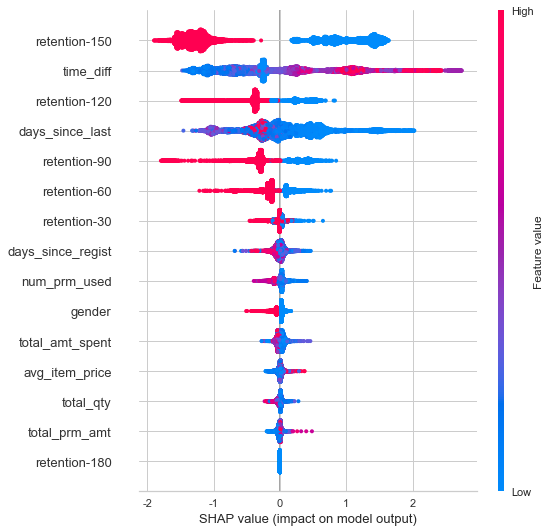

In [65]:
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][1], features=X_test.iloc[1], feature_names=X_test.columns)

In [ ]:
# 지금 결과는 데이터 leakage가 심각해보인다 -> 너무 긍정적으로 검토하면 뒤통수맞을 수 있다. -> 성능보고 대시보드 협업 고려해봐라
# 90퍼센트에 가까운 성능이 나오면 룰베이스로도 그 결과가 나온다 -> 룰 베이스의 인사이트가 나오면 그 부분을 고려해서 분석을 하면 좋겠다.-> 유의미한 인사이트가 될 수 있다. 

# train과 test를 분리 -> test를 마찬가지로 별도의 train과 관련없는 기간에서 추출 <- 지금처럼 train_test_split하면 leakage가 있을 가능성이 높음

# test는 최근 데이터로 할 것
# train 데이터에 실수로 포함되지 않게끔 validation 데이터를 따로 뽑아내서 검증해볼것

In [ ]:
# 30일 단위 윈도우 보단 월별이 더 나아보인다. (정답은 없음) <- 이렇게 한다면 윈도우랑 브라켓은 동기화를 하나? 브라켓 사이즈는 통일 되어야할 것 같은데...
# 대시보드에서 weekly로 매출을 보여준다면, 이탈도 weekly로 볼 수도 있다. -> 고려해볼 것

In [ ]:
# 만약 내 의도대로 되지 않으면 에러를 일으키는 코드를 집어넣고 확인한다. <- 이프레이즈